# Extracting zip

In [13]:
import os
import zipfile
import pandas as pd
import numpy as np

raw_folder = "../../data/raw"
zip_path = os.path.join(raw_folder, "amazon_reviews.zip")

# Create a subfolder for the extracted contents

extract_folder = os.path.join(raw_folder, "amazon_reviews")
csv_path = os.path.join(extract_folder, "train.csv")

# Create the extraction folder if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)
    print(f"Created folder: {extract_folder}")

# Extract the zip file if the CSV doesn't already exist
if not os.path.exists(csv_path):
    print("CSV file not found. Extracting from zip...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("Extraction complete!")
else:
    print("CSV file already exists.")

CSV file already exists.


# Load data sample

In [14]:
df = pd.read_csv(csv_path, header=None, nrows=200000)
df.columns = ["polarity","review", "sentiment"]

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   polarity                                             review  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                           sentiment  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   polarity   200000 non-null  int64 
 1   review     199982 non-null  object
 2 

Visualize class distribution

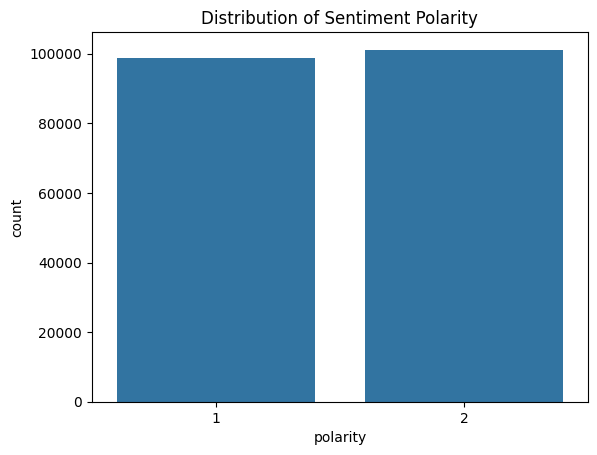

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="polarity", data=df)
plt.title("Distribution of Sentiment Polarity")
plt.show()


Analyze text lengths

Text(0, 0.5, 'Frequency')

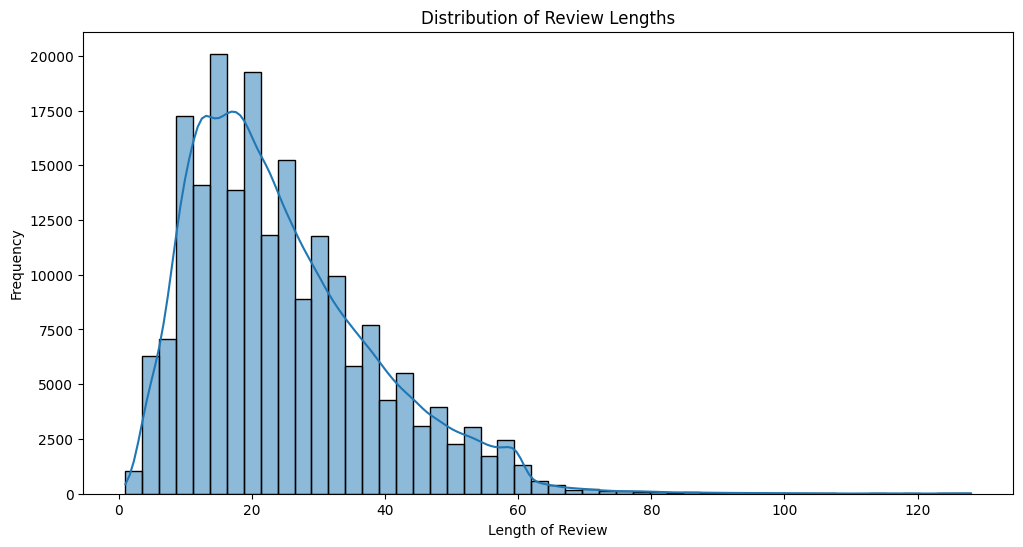

In [16]:
df['review'] = df['review'].astype(str)
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review")
plt.ylabel("Frequency")

Plot the most common words

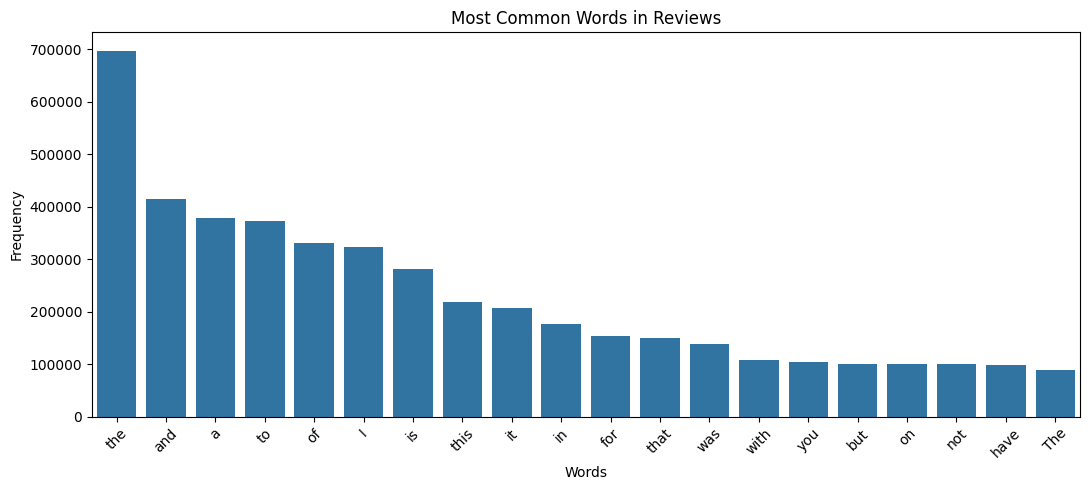

In [17]:
from collections import Counter
all_words = ' '.join([text for text in df['review'] + df['sentiment']])
word_counts = Counter(all_words.split())

most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(11, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Most Common Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





Based on the above analysis of the 20 most common words, it is apparent we need to introduce stop word removal during our preprocessing phase.